In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pystan
from scipy.stats import mstats
%matplotlib inline

In [2]:
plt.style.use("ggplot")

In [3]:
df = pd.read_excel("./data/dose_response.xlsx")

In [4]:
df.head()

,log10 C,death
0,0.95,0
1,0.94,0
2,0.95,0
3,0.96,0
4,0.99,0


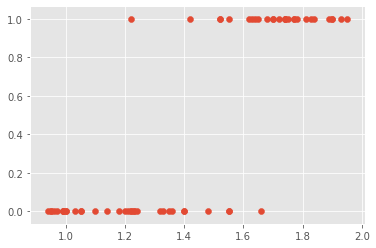

In [5]:
plt.scatter(df["log10 C"], df["death"])

In [6]:
stan_model="""
data{
    int N;
    real X[N];
    int<lower=0, upper=1> Y[N];
}

parameters{
    real a;
    real b;
}

model{
    for (n in  1:N){
        Y[n]~bernoulli_logit(a*X[n]+b);
    }

}
"""

In [7]:
sm=pystan.StanModel(model_code=stan_model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9bc4d3b56636996c90093c8563247849 NOW.


In [9]:
stan_data={"N":df.shape[0], "X":df["log10 C"], "Y":df["death"]}

In [11]:
fit=sm.sampling(data=stan_data, iter=2000, chains=3, seed=123)

In [12]:
fit

Inference for Stan model: anon_model_9bc4d3b56636996c90093c8563247849.
3 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=3000.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a     13.47    0.18   3.54   7.31  11.05  13.18  15.56  21.72    368   1.01
b    -20.09    0.28   5.35 -32.54 -23.31 -19.65 -16.43 -10.82    368   1.01
lp__ -14.96    0.05   1.12  -18.0  -15.4 -14.61 -14.18 -13.89    508   1.01

Samples were drawn using NUTS at Thu Oct 10 11:36:10 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

In [13]:
a, b=13.47, -20.09

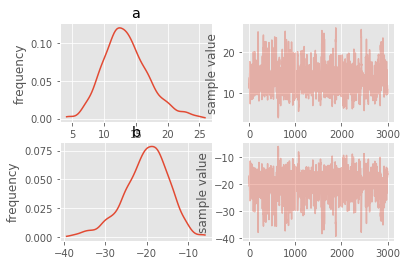

In [14]:
fig=fit.plot()

In [15]:
ms_a=fit.extract("a")["a"]
ms_b=fit.extract("b")["b"]

In [18]:
x=np.arange(1, 2, 0.01)

f=lambda x: 1.0/(1.0+np.exp(-x))
df_b=pd.DataFrame([])
for i in range(x.shape[0]):
    df_b[i]=f(ms_a*x[i]+ms_b)

In [19]:
df_b

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.012349,0.013590,0.014955,0.016454,0.018101,0.019909,0.021894,0.024072,0.026461,0.029079,...,0.987306,0.988467,0.989522,0.990482,0.991355,0.992149,0.992870,0.993525,0.994120,0.994661
1,0.004144,0.004609,0.005125,0.005699,0.006336,0.007045,0.007832,0.008706,0.009677,0.010755,...,0.984027,0.985621,0.987057,0.988352,0.989518,0.990569,0.991515,0.992367,0.993134,0.993825
2,0.000306,0.000360,0.000424,0.000499,0.000588,0.000692,0.000815,0.000960,0.001130,0.001331,...,0.998682,0.998881,0.999049,0.999193,0.999315,0.999418,0.999506,0.999580,0.999644,0.999697
3,0.000042,0.000051,0.000063,0.000078,0.000096,0.000118,0.000145,0.000179,0.000220,0.000272,...,0.999828,0.999861,0.999887,0.999908,0.999925,0.999939,0.999951,0.999960,0.999968,0.999974
4,0.001501,0.001704,0.001935,0.002198,0.002496,0.002834,0.003217,0.003653,0.004147,0.004708,...,0.993063,0.993888,0.994615,0.995256,0.995821,0.996319,0.996758,0.997144,0.997485,0.997785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.001188,0.001362,0.001562,0.001791,0.002053,0.002354,0.002699,0.003094,0.003547,0.004065,...,0.996306,0.996777,0.997189,0.997548,0.997861,0.998135,0.998373,0.998581,0.998763,0.998921
2996,0.000810,0.000946,0.001105,0.001290,0.001506,0.001759,0.002054,0.002398,0.002800,0.003269,...,0.998954,0.999105,0.999233,0.999344,0.999438,0.999519,0.999588,0.999647,0.999698,0.999741
2997,0.000058,0.000069,0.000083,0.000099,0.000118,0.000141,0.000168,0.000201,0.000240,0.000287,...,0.998101,0.998410,0.998669,0.998886,0.999067,0.999219,0.999346,0.999453,0.999542,0.999617
2998,0.000179,0.000209,0.000245,0.000287,0.000335,0.000393,0.000459,0.000538,0.000629,0.000736,...,0.996060,0.996631,0.997120,0.997539,0.997896,0.998202,0.998463,0.998687,0.998878,0.999041


In [20]:
low_y50, high_y50=mstats.mquantiles(df_b, [0.25, 0.75], axis=0)
low_y95, high_y95=mstats.mquantiles(df_b, [0.025, 0.975], axis=0)

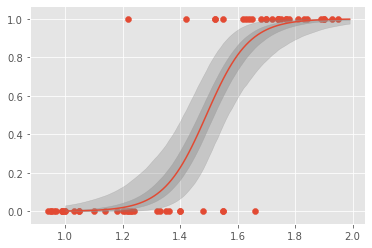

In [24]:
plt.scatter(df["log10 C"], df["death"])
plt.fill_between(x, low_y50, high_y50, alpha=0.6, color="darkgray")
plt.fill_between(x, low_y95, high_y95, alpha=0.3, color="gray")
plt.plot(x,f(a*x+b))